<a href="https://colab.research.google.com/github/erickgt00/tesina/blob/main/Tesina2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix, classification_report

In [9]:
# Cargar los datos originales desde un archivo CSV
data_path = "BaseDatosSofom.csv"
data = pd.read_csv(data_path)

# Cargar el archivo Excel con las clasificaciones de riesgo
excel_path = "BaseTesina.xlsx"
excel_data = pd.ExcelFile(excel_path)

# Leer las hojas relevantes del archivo Excel en dataframes
variables_info = {sheet: pd.read_excel(excel_path, sheet_name=sheet) for sheet in excel_data.sheet_names}

# Extraer las distribuciones de los datos originales para cada variable
distributions = {}
for column in data.columns:
    if column not in ['ID', 'LATITUD', 'LONGITUD']:
        distributions[column] = data[column].value_counts(normalize=True)

# Generar la simulación de 50,000 inputs excluyendo ID, LATITUD y LONGITUD
simulated_data = []

for i in range(50000):
    row = {}
    for column, dist in distributions.items():
        row[column] = np.random.choice(dist.index, p=dist.values)
    simulated_data.append(row)

simulated_df = pd.DataFrame(simulated_data)


# Mostrar las primeras filas del dataframe simulado normalizado
print(simulated_df.head())

# Guardar el dataframe simulado normalizado en un archivo CSV
simulated_df.to_csv("SimulatedData.csv", index=False)


   Cluster  Riesgo de credito  TipoInmueble  Tamaño  Dueño  CostoM2  Valor  \
0        0                 75            85      75     30       65     50   
1        1                 50            35      40     30       40     50   
2        3                 50            85      40     30       40     50   
3        3                 85            85      75     30       40     80   
4        0                 30            75      40     65       40     30   

   Habitado  PosesionDueño  Ubicación  ...  Servicios  Arrendado  MenoresEdad  \
0        10             40         55  ...         10         20           90   
1        80             20         20  ...         10         50           30   
2        10             40         20  ...         10         50           90   
3        80             40         35  ...         10         20           30   
4        80             40         55  ...         65         20           30   

   UsoSuelo  Escrituras  Construccion  Deman

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

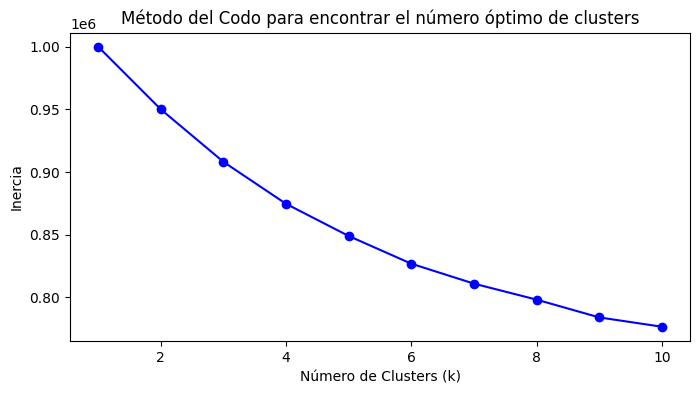

In [10]:
# Cargar los datos originales y los datos simulados
data_path = "BaseDatosSofom.csv"
data = pd.read_csv(data_path)

simulated_data_path = "SimulatedData.csv"
simulated_df = pd.read_csv(simulated_data_path)

# Separar las características y el cluster original
X_test = data.drop(columns=['ID', 'LATITUD', 'LONGITUD', 'Cluster'])
y_test = data['Cluster']

X_train = simulated_df.drop(columns=['Cluster'])

# Normalizar los datos
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Método del Codo
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_normalized)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo para encontrar el número óptimo de clusters')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

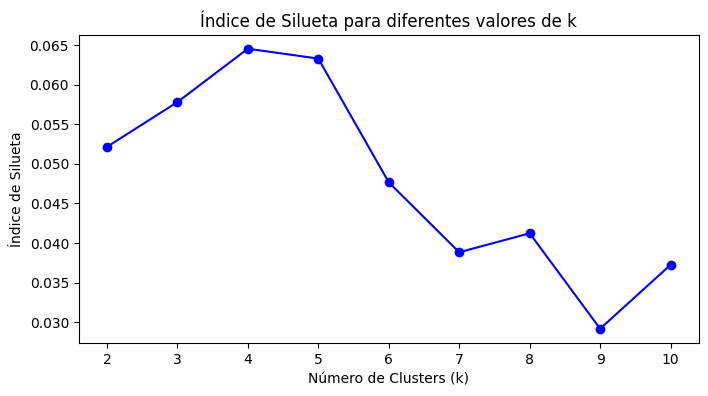

In [11]:
# Calcular el índice de silueta para varios valores de k
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_train_normalized)
    silhouette_scores.append(silhouette_score(X_train_normalized, labels))

plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), silhouette_scores, 'bo-')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Índice de Silueta')
plt.title('Índice de Silueta para diferentes valores de k')
plt.show()


In [12]:
# Elegir el número óptimo de clusters basado en el método del codo y el índice de silueta

optimal_k = 4

# Entrenar el modelo K-means
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_train_normalized)
y_train_pred = kmeans.labels_

# Predecir los clusters para los datos de prueba
y_test_pred = kmeans.predict(X_test_normalized)

# Matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Matriz de Confusión:\n", conf_matrix)

# Reporte de Clasificación
class_report = classification_report(y_test, y_test_pred)
print("Reporte de Clasificación:\n", class_report)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Matriz de Confusión:
 [[0 3 5 1]
 [1 2 4 0]
 [1 1 3 0]
 [2 0 0 2]]
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.33      0.29      0.31         7
           2       0.25      0.60      0.35         5
           3       0.67      0.50      0.57         4

    accuracy                           0.28        25
   macro avg       0.31      0.35      0.31        25
weighted avg       0.25      0.28      0.25        25



Número de etiquetas verdaderas: 25
Número de predicciones: 25


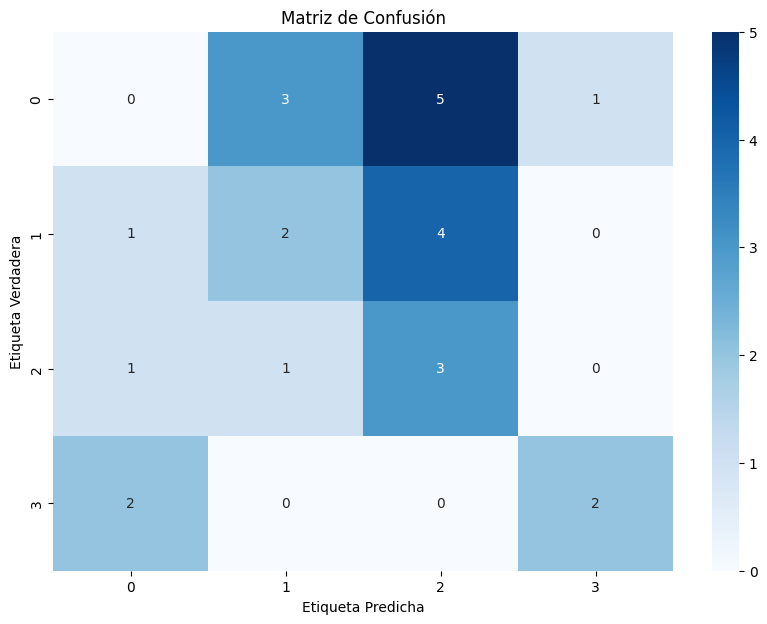

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Verificación del tamaño de las predicciones y las etiquetas reales
print("Número de etiquetas verdaderas:", len(y_test))
print("Número de predicciones:", len(y_test_pred))

etiquetas = ['0', '1', '2', '3']  # Ajusta esto según las etiquetas reales que manejas

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_test_pred, labels=[int(e) for e in etiquetas])

# Crear el heatmap de seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=etiquetas, yticklabels=etiquetas)
plt.title('Matriz de Confusión')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.show()


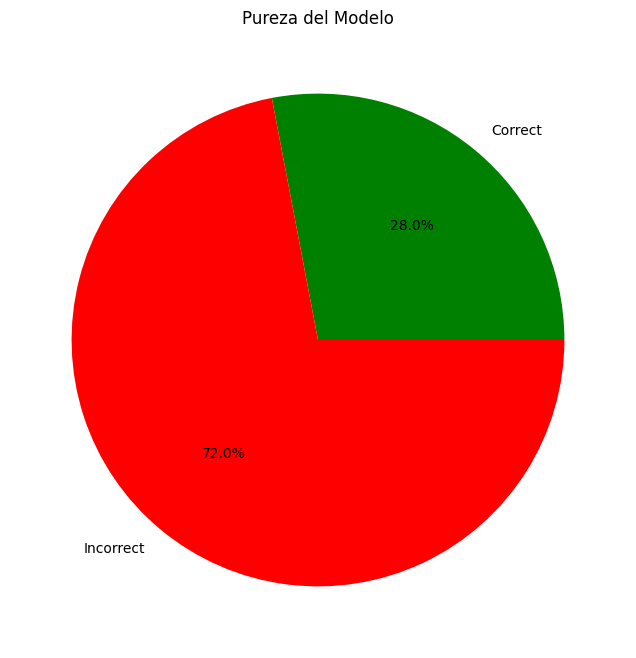

In [14]:
def plot_purity_pie_chart(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    correct_predictions = sum(cm.diagonal())
    incorrect_predictions = sum(cm.sum(axis=0)) - correct_predictions
    plt.figure(figsize=(8, 8))
    plt.pie([correct_predictions, incorrect_predictions], labels=['Correct', 'Incorrect'], autopct='%1.1f%%', colors=['green', 'red'])
    plt.title('Pureza del Modelo')
    plt.show()

plot_purity_pie_chart(y_test, y_test_pred)
